In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import for reading from yahoo fin
from pandas_datareader import data
from datetime import datetime

Now From Yahoo we can get the data, together with DataReader 

In [ ]:
#define stocks to be used for data analysis
stock_list = ['AAPL']
#start and end date for fetching data
end = datetime.now() #data from now to one year
start = datetime(end.year-1, end.month, end.day)
for stock_symbol in stock_list:
    globals() [stock_symbol] = data.DataReader(stock_symbol, 'yahoo', start , end)

NameError: ignored

In [ ]:
AAPL.describe()

NameError: ignored

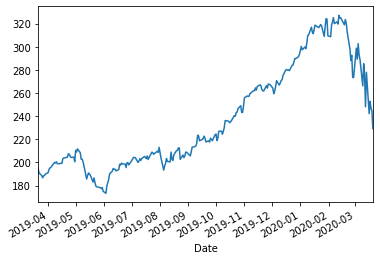

In [ ]:
# Closing Price
AAPL['Close'].plot()

In [ ]:
df = pd.DataFrame(AAPL['Close'].values)

In [ ]:
# 253 days or closing price
df.shape

(253, 1)

In [ ]:
df.columns

RangeIndex(start=0, stop=1, step=1)

In [ ]:
df.index

RangeIndex(start=0, stop=253, step=1)

AD FULLER test for Series Stationary or not. 
Mean if p > 0.05 then it's moving otherwise Stationary.
Here it is up and down so it's not 

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pandas as pd
result = adfuller(df.dropna().values.ravel())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.461766
p-value: 0.552333


In [ ]:
#p values is signiificant > 0.05, The series is not stationary

In [ ]:
df.shape

(253, 1)

In [ ]:
df.index

RangeIndex(start=0, stop=253, step=1)

Now we need to try to get the D value for the Series, which is how many time we need to devide the series.
Keep differencing the series untill it is stationary. 

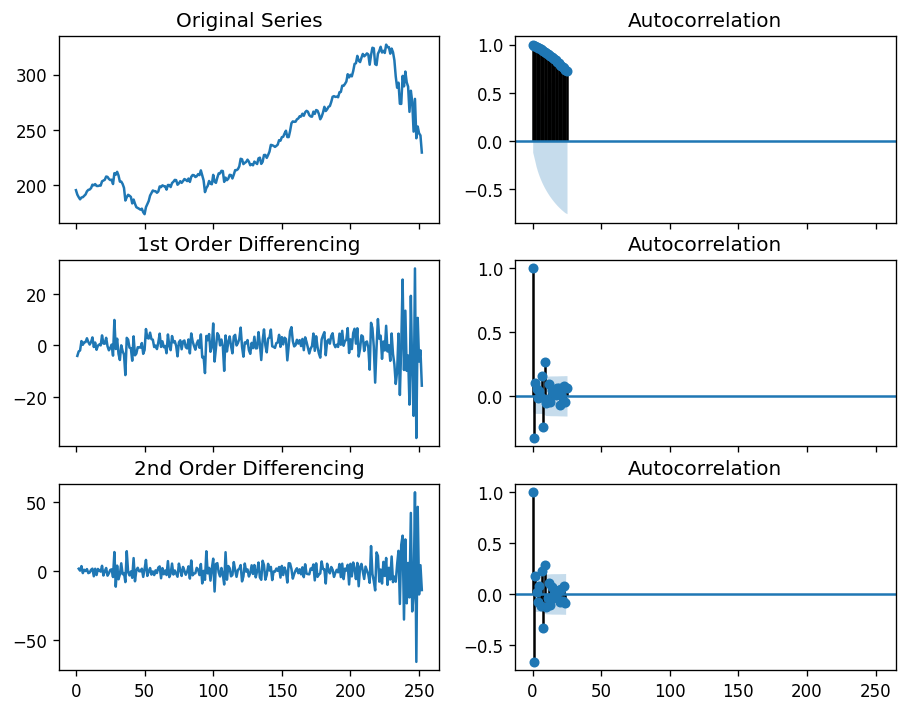

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.iloc[:,0]); axes[0, 0].set_title('Original Series')
plot_acf(df.iloc[:,0], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.iloc[:,0].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.iloc[:,0].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.iloc[:,0].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.iloc[:,0].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
#Series could be stationary with d =1 or d=2

In [ ]:
#for now , lest use d=2

How to find the order of the AR term (p) The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

But what is PACF?

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

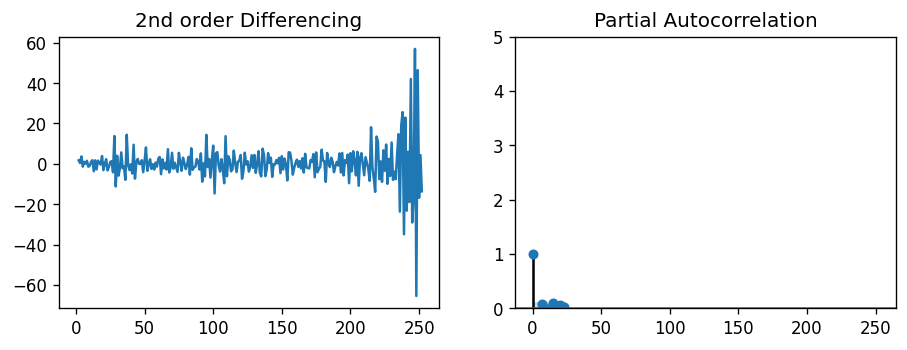

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.iloc[:,0].diff().diff()); axes[0].set_title('2nd order Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.iloc[:,0].diff().diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
#p =1, for AR lagged terms

How to find the order of the MA term (q) Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

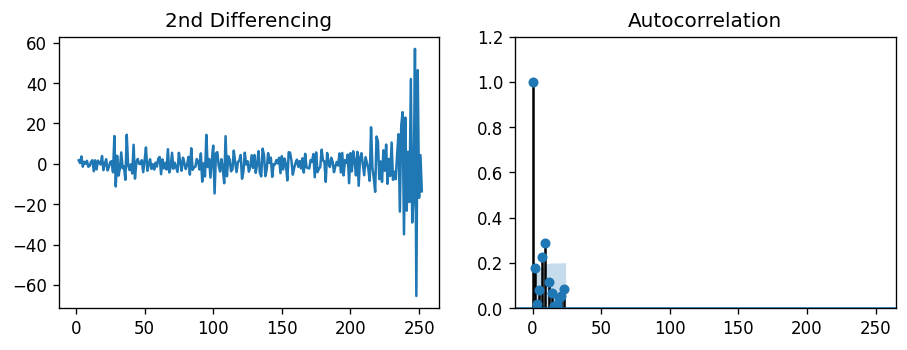

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.iloc[:,0].diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.iloc[:,0].diff().diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
#q = 1. MA lagged terms

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.iloc[:,0], order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  251
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -789.407
Method:                       css-mle   S.D. of innovations              5.586
Date:                Sat, 21 Mar 2020   AIC                           1586.814
Time:                        21:56:14   BIC                           1600.916
Sample:                             2   HQIC                          1592.489
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0145      0.017     -0.850      0.396      -0.048       0.019
ar.L1.D2.y    -0.3827      0.060     -6.359      0.000      -0.501      -0.265
ma.L1.D2.y    -0.9381      0.023    -40.581      0.0

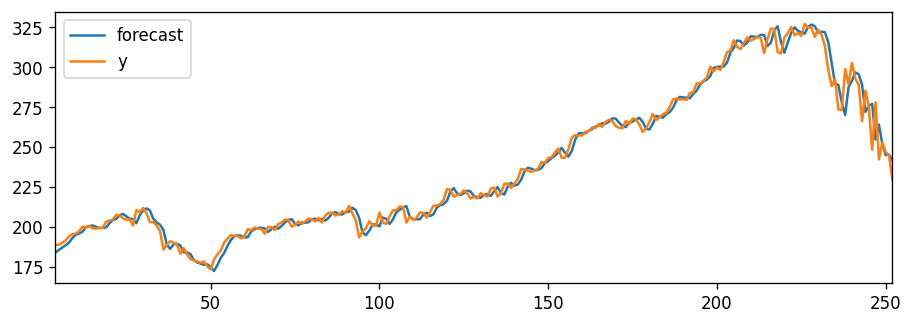

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

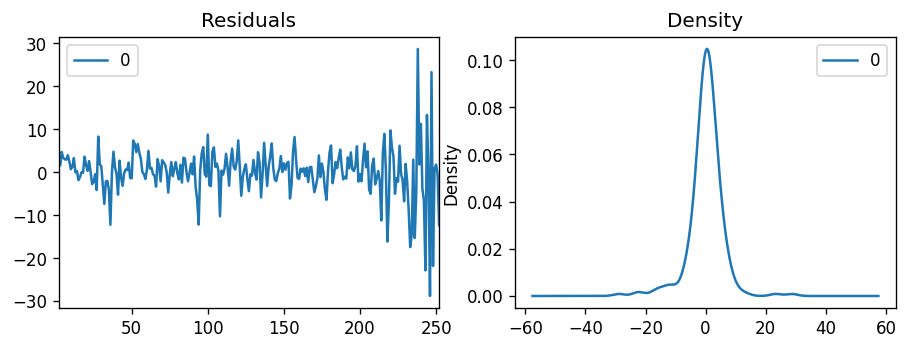

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
#Predicting 20 days

In [ ]:
df.shape

(253, 1)

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.iloc[:,0][:200]
test = df.iloc[:,0][200:]

In [ ]:
train.shape, test.shape

((200,), (53,))

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  198
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -510.354
Method:                       css-mle   S.D. of innovations              3.143
Date:                Sat, 21 Mar 2020   AIC                           1028.707
Time:                        21:59:09   BIC                           1041.860
Sample:                             2   HQIC                          1034.031
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0079      0.004      2.116      0.036       0.001       0.015
ar.L1.D2.y    -0.0380      0.072     -0.531      0.596      -0.178       0.102
ma.L1.D2.y    -1.0000      0.014    -73.760      0.0

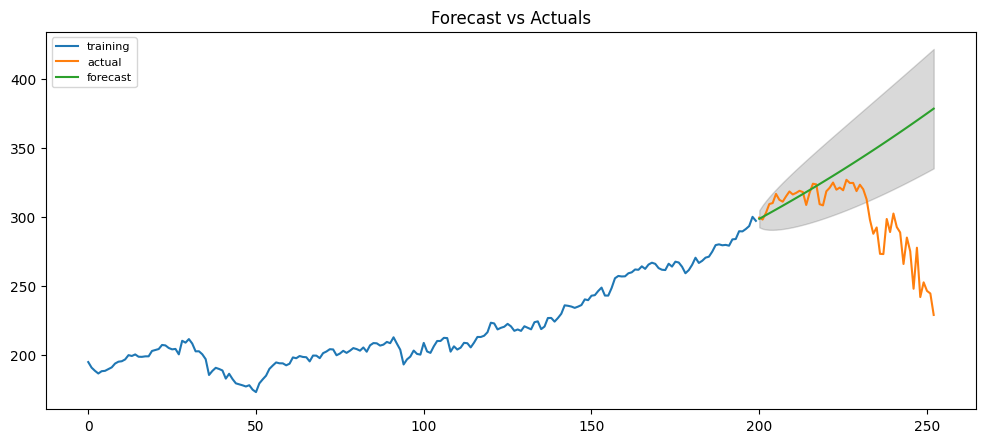

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(53, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#Or to see what COVID-19 did
# Create Training and Test
train = df.iloc[:,0][:248]
test = df.iloc[:,0][248:]

In [ ]:
train.shape, test.shape

((248,), (5,))

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  246
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -763.286
Method:                       css-mle   S.D. of innovations              5.347
Date:                Sat, 21 Mar 2020   AIC                           1534.572
Time:                        22:00:15   BIC                           1548.593
Sample:                             2   HQIC                          1540.217
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.009     -0.307      0.759      -0.020       0.015
ar.L1.D2.y    -0.2400      0.073     -3.285      0.001      -0.383      -0.097
ma.L1.D2.y    -0.9780      0.033    -29.667      0.0

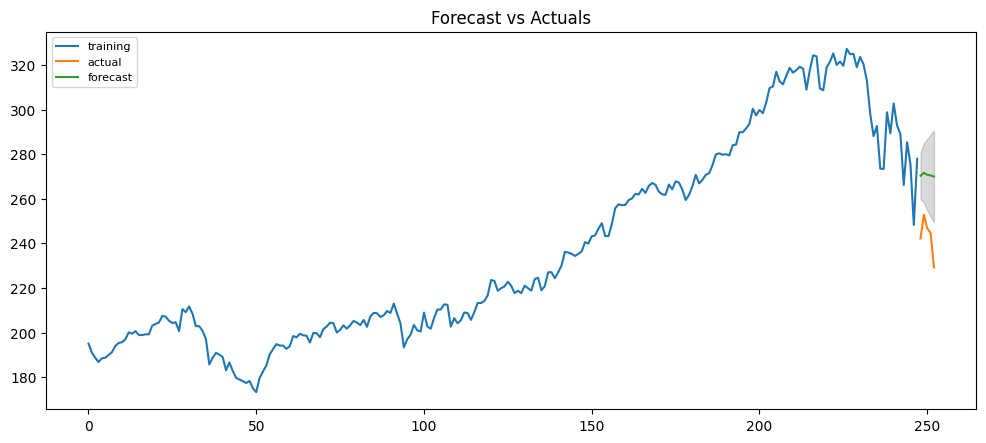

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(5, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

#> {'mape': 0.02250131357314834,
#>  'me': 3.230783108990054,
#>  'mae': 4.548322194530069,
#>  'mpe': 0.016421001932706705,
#>  'rmse': 6.373238534601827,
#>  'acf1': 0.5105506325288692,
#>  'corr': 0.9674576513924394,
#>  'minmax': 0.02163154777672227}

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.022646624182438017,
 'corr': 0.8772523212169661,
 'mae': 27.482494372212557,
 'mape': 0.11413449626324423,
 'me': 27.482494372212557,
 'minmax': 0.1015964549524897,
 'mpe': 0.11413449626324423,
 'rmse': 28.438255982899115}

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 4.8MB/s 


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.iloc[:,0], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1586.811, BIC=1600.913, Time=0.155 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1856.910, BIC=1863.961, Time=0.016 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1714.129, BIC=1724.705, Time=0.058 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1621.213, BIC=1631.789, Time=0.140 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=1854.916, BIC=1858.441, Time=0.015 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1586.775, BIC=1604.402, Time=0.186 seconds
Fit ARIMA: (2, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=1656.228, BIC=1670.330, Time=0.101 seconds
Fit ARIMA: (3, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=1588.727, BIC=1609.880, Time=0.276 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=1576.146, BIC=1597.298, Time=0.454 seconds
Near non-invertible roots for order (2, 2, 2)(0, 0, 0, 0); setting score t

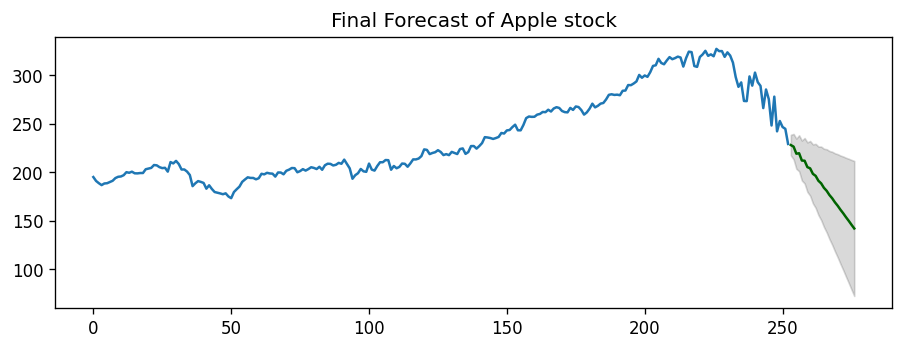

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.iloc[:,0]), len(df.iloc[:,0])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.iloc[:,0])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.title("Final Forecast of Apple stock")
plt.show()